In [7]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [3]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

## Build NN Model

In [4]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [5]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [6]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.2774 - accuracy: 0.9190 - val_loss: 0.0594 - val_accuracy: 0.9815
Epoch 2/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0729 - accuracy: 0.9781 - val_loss: 0.0406 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0353 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0296 - val_accuracy: 0.9905
Epoch 5/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0289 - val_accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0266 - val_accuracy: 0.9907
Epoch 7/10
21400/60000 [=========>....................] 

KeyboardInterrupt: 

In [ ]:
# Save the model
model.save('model/mnistCNN.h5')

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

## Load Model
載入keras所訓練好的Model，並載入一張照片預測看看

#### 載入測試影像

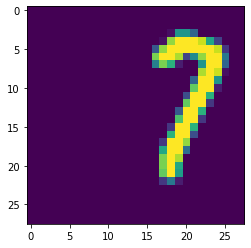

In [8]:
# Method1
image = cv2.imread("./data/7-3.png")[:,:,::-1]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)/255
reshapImg = np.array(image)
reshapImg = reshapImg.reshape(1,28,28,1)
plt.imshow(image)

#### 載入Model並預測 

In [11]:
# Importing the Keras libraries and packages
from keras.models import load_model
model = load_model('model/mnistCNN.h5')
y_pred = model.predict([reshapImg])
pred =  np.argmax(y_pred, axis=1)
print('Predict: ',pred[0])

Predict:  7
